### 0. Load libraries and custom functions
* If files are not available for plotting, please run get_data.ipynb to download/generate the files.

In [1]:
from functions import load_cdta_df, load_cdta_df_per_month,\
                    plot_total_trips_interactive, plot_trips_per_month_interactive, plot_on_map_interactive,\
                    plot_total_trips, plot_trips_per_month, plot_on_map,\
                    create_interactive_map, print_top_table, create_map_with_table

import ipywidgets as widgets

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
cdta_df = load_cdta_df(folder_name="data\\cdta_df")
dfs, year_months = load_cdta_df_per_month(folder_name="data\\cdta_df",
                        year_month_list = ['2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06'])

cdta_df loaded from c:\Users\Admin\Documents\GitHub\NYC-Transportation-and-Socioeconomic-Data-Analysis\taxi\data\cdta_df.
cdta_df_PU_2022-01.csv loaded from c:\Users\Admin\Documents\GitHub\NYC-Transportation-and-Socioeconomic-Data-Analysis\taxi\data\cdta_df.
cdta_df_PU_2022-02.csv loaded from c:\Users\Admin\Documents\GitHub\NYC-Transportation-and-Socioeconomic-Data-Analysis\taxi\data\cdta_df.
cdta_df_PU_2022-03.csv loaded from c:\Users\Admin\Documents\GitHub\NYC-Transportation-and-Socioeconomic-Data-Analysis\taxi\data\cdta_df.
cdta_df_PU_2022-04.csv loaded from c:\Users\Admin\Documents\GitHub\NYC-Transportation-and-Socioeconomic-Data-Analysis\taxi\data\cdta_df.
cdta_df_PU_2022-05.csv loaded from c:\Users\Admin\Documents\GitHub\NYC-Transportation-and-Socioeconomic-Data-Analysis\taxi\data\cdta_df.
cdta_df_PU_2022-06.csv loaded from c:\Users\Admin\Documents\GitHub\NYC-Transportation-and-Socioeconomic-Data-Analysis\taxi\data\cdta_df.
cdta_df_DO_2022-01.csv loaded from c:\Users\Admin\Docume

### 1. Plot the following to see trends and patterns in taxi trips in Jan-Jun 2022:
- total and monthly trip count for each day of the month
- total and monthly trip count for each hour or the day
- total and monthly trip count for each weekday
- total trip count for each borough

interactive(children=(Dropdown(description='pickup_or_dropoff', options=('Pickup', 'Dropoff'), value='Pickup')…

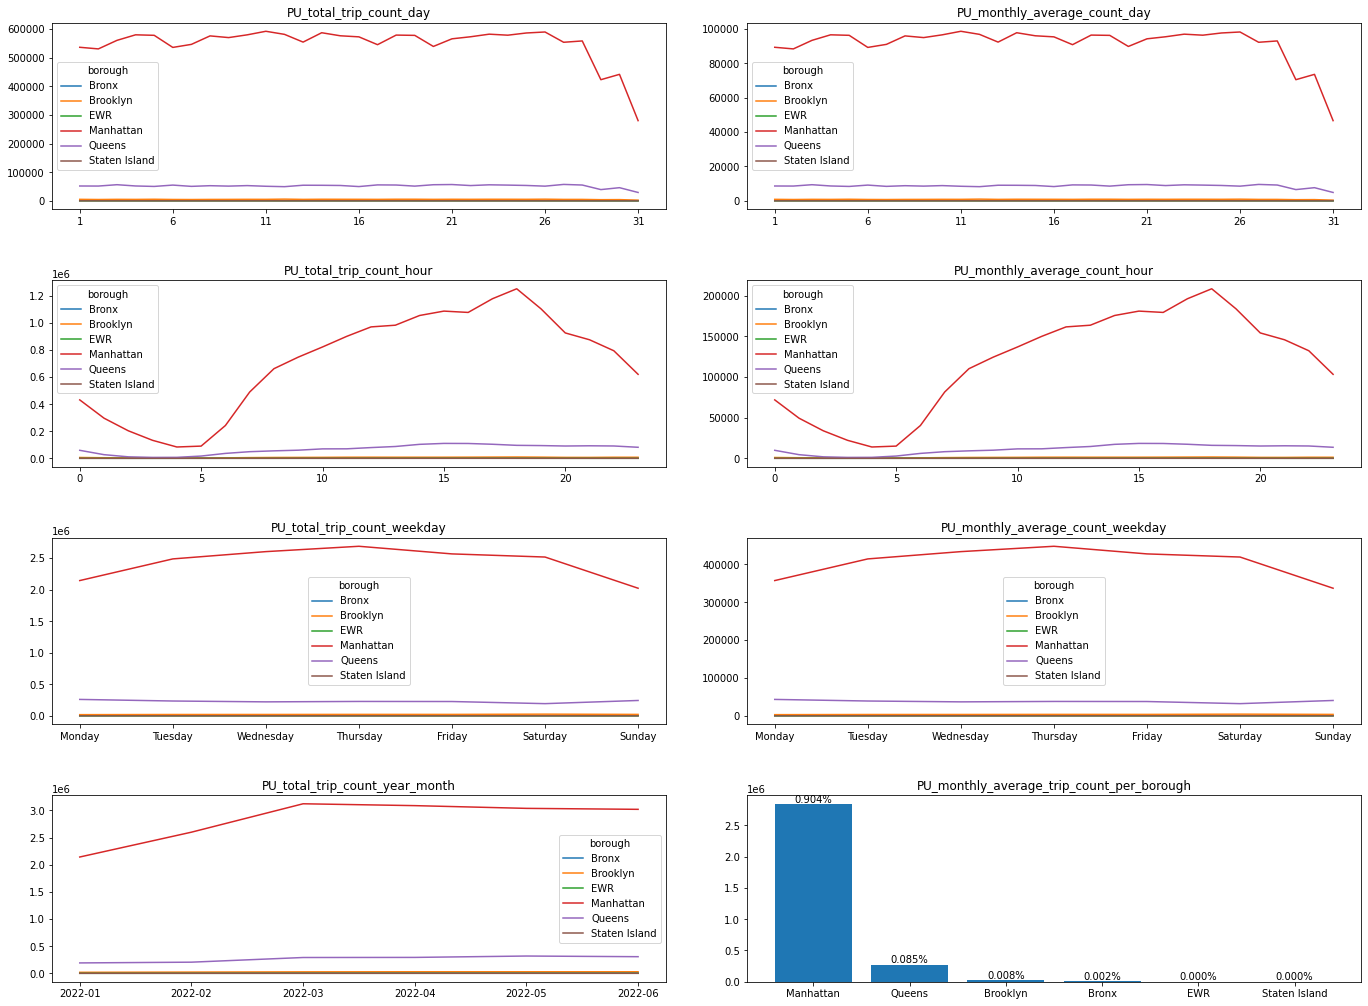

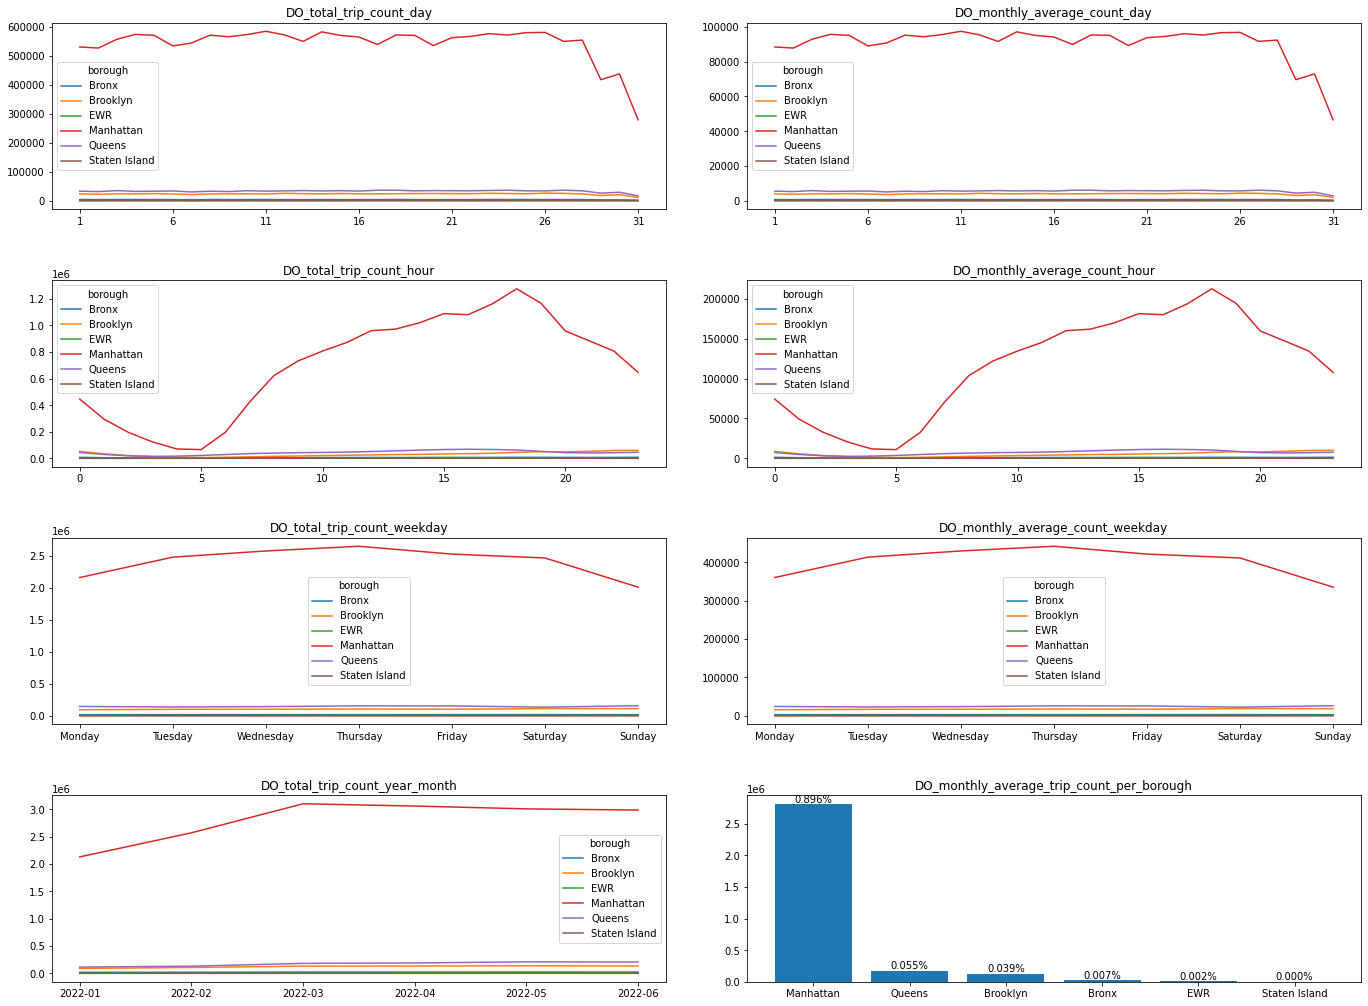

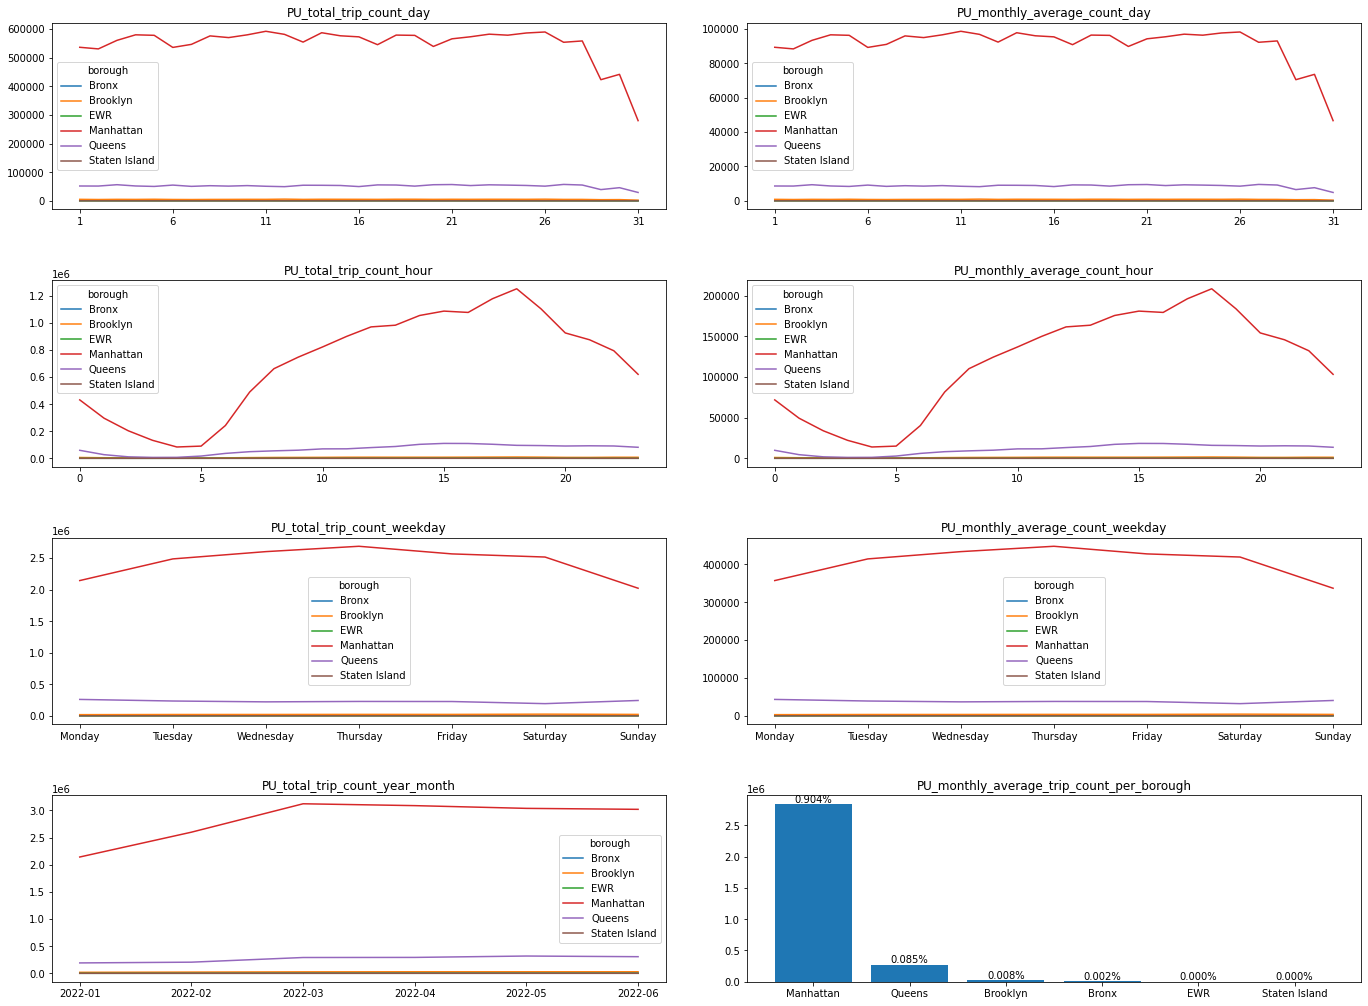

In [4]:
m = widgets.interactive(plot_total_trips_interactive, pickup_or_dropoff = ["Pickup", "Dropoff"])
display(m)

#### Findings:
- Taxi rides are quite evenly spread throughout the months; no distinct or interesting trends in taxi rides for each day of the month.
- Peak time for taxi rides appears to be around 6pm.
- Slightly fewer taxi rides on Monday and Sunday.
- Trip counts are lower in January and February, probably due to more tightened covid restrictions at the time.
- Around 90% of taxi rides started or ended in Manhattan; almost 99% of taxi rides were picked up in Manhattan and Queens, and there were slightly more drop-offs in Brooklyn compared to pick-ups.

### 2. Create similar plots as above but for each month in Jan-Jun 2022 as a GIF file.

In [3]:
m = widgets.interactive(plot_trips_per_month_interactive, pickup_or_dropoff = ["Pickup", "Dropoff"])
display(m)

interactive(children=(Dropdown(description='pickup_or_dropoff', options=('Pickup', 'Dropoff'), value='Pickup')…

![PU_trip_counts_per_month.gif](data/png/PU_trip_counts_per_month.gif)

![DO_trip_counts_per_month.gif](data/png/DO_trip_counts_per_month.gif)

#### Findings:
- Cyclic trends in trip count for each day of the month; the cycle appears to be a week.
- Little changes over time in trip count for each hour of the day - peak time after ordinary working hours.
- There were some variations over time in trip count for each weekday but there were generally fewer taxi rides on Monday and Sunday.
- In all months, the vast majority of the taxi rides happened in Manhattan.

### 3. Plot sum and average of passenger count, total fare, congestion charge, airport fee, duration, trip distance, minute per mile, and total trip count for each CDTA on the map of NYC.

In [1]:
from functions import load_cdta_df, load_cdta_df_per_month,\
                    plot_total_trips_interactive, plot_trips_per_month_interactive, plot_on_map_interactive,\
                    plot_total_trips, plot_trips_per_month, plot_on_map,\
                    create_interactive_map, print_top_table, create_map_with_table

import ipywidgets as widgets

m = widgets.interactive(plot_on_map_interactive,
                        exclude_manhattan = [False, True])
display(m)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


interactive(children=(Dropdown(description='exclude_manhattan', options=(False, True), value=False), Output())…

### 4. Create interactive choropleth to interactively see details from a tooltip for each CDTA.

In [ ]:
print(list(cdta_df.columns))

In [4]:
# Get a list of columns to plot.
cols = [
    'PU_total_trip_count', 'PU_minute_per_mile', 'PU_total_passenger_count', 'PU_total_trip_distance (mile)',
    'PU_total_fare', 'PU_total_congestion_surcharge', 'PU_total_airport_fee', 'PU_total_duration (min)',
    'PU_average_passenger_count', 'PU_average_trip_distance (mile)', 'PU_average_fare',
    'PU_average_congestion_surcharge', 'PU_average_airport_fee', 'PU_average_duration (min)',
    'DO_total_trip_count', 'DO_minute_per_mile', 'DO_total_passenger_count', 'DO_total_trip_distance (mile)',
    'DO_total_fare', 'DO_total_congestion_surcharge', 'DO_total_airport_fee', 'DO_total_duration (min)',
    'DO_average_passenger_count', 'DO_average_trip_distance (mile)', 'DO_average_fare',
    'DO_average_congestion_surcharge', 'DO_average_airport_fee', 'DO_average_duration (min)']
    
m = widgets.interactive(create_map_with_table, col=cols, top_n=range(0, len(cdta_df.CDTA.unique())+5, 5))
display(m)

interactive(children=(Dropdown(description='col', options=('PU_total_trip_count', 'PU_minute_per_mile', 'PU_to…

In [ ]:
import pandas as pd
socio_df = pd.read_csv(os.path.dirname(os.getcwd()) + "\\socio\\data\\socioecoomic.csv", index_col=0)
socio_df["Community District"] = socio_df["Community District"].apply(lambda x: x.replace(" ", ""))
socio_df = socio_df.rename(columns={" Indicator Description": "Indicator Description"})
socio_df

In [ ]:
all_cols = [
    'Born in New York State',
    'Disabled population',
    'Foreign-born population',
    'Population',
    'Population aged 65+',
    'Households with children under 18 years old',
    'Single-person households',
    'Percent Asian',
    'Percent Black',
    'Percent Hispanic',
    'Percent white',
    'Racial diversity index',
    'Income diversity ratio',
    'Median household income (2021$)',
    'Median household income, homeowners (2021$)',
    'Median household income, renters (2021$)',
    'Poverty rate',
    'Poverty rate, population aged 65+',
    'Poverty rate, population under 18 years old',
    'Labor force participation rate',
    'Population aged 25+ without a high school diploma',
    'Unemployment rate',
    'Homeownership rate',
    'Housing units',
    'Rental vacancy rate',
    'Serious housing code violations (per 1,000 privately owned rental units)',
    'Severe crowding rate (% of renter households)',
    'Total housing code violations (per 1,000 privately owned rental units)',
    'Notices of foreclosure rate (per 1,000 1-4 family and condo properties)',
    'Notices of foreclosure, all residential properties',
    'Notices of foreclosure, initial, 1-4 family and condo properties',
    'Notices of foreclosure, repeat, 1-4 family and condo properties',
    'Pre-foreclosure notice rate (per 1,000 1-4 family and condo properties)',
    'Pre-foreclosure notices, 1-4 family and condo properties',
    'Properties entering REO, 1-4 family',
    'FHA/VA-backed home purchase loans (% of home purchase loans)',
    'Higher-cost home purchase loans (% of home purchase loans)',
    'Higher-cost refinance loans (% of refinance loans)',
    'Home purchase loan rate (per 1,000 properties)',
    'Home purchase loans in LMI tracts (% of home purchase loans)',
    'Home purchase loans to LMI borrowers (% of home purchase loans)',
    'Refinance loan rate (per 1,000 properties)',
    'Sales volume, 1 family building',
    'Sales volume, 2-4 family building',
    'Sales volume, 5+ family building',
    'Sales volume, condominium',
    'Sales volume, all property types',
    'Median sales price per unit, 1 family building (2021$)',
    'Median sales price per unit, 2-4 family building (2021$)',
    'Median sales price per unit, 5+ family building (2021$)',
    'Median sales price per unit, condominium (2021$)',
    'Index of housing price appreciation, 1 family building',
    'Index of housing price appreciation, 2-4 family building',
    'Index of housing price appreciation, 5+ family building',
    'Index of housing price appreciation, condominium',
    'Index of housing price appreciation, all property types',
    'Population density (1,000 persons per square mile)',
    'Units authorized by new residential building permits',
    'Units issued new certificates of occupancy',
    'Car-free commute (% of commuters)',
    'Mean travel time to work (minutes)',
    'Serious crime rate (per 1,000 residents)',
    'Serious crime rate, property (per 1,000 residents)',
    'Serious crime rate, violent (per 1,000 residents)',
    'Students performing at grade level in English language arts, 4th grade',
    'Students performing at grade level in math, 4th grade',
    'Median rent, 2- and 3-bedrooms (2021$)',
    'Median rent, all (2021$)',
    'Median rent, recent movers (2021$)',
    'Median rent, studios and 1-bedrooms (2021$)',
    'Change in collected rent (2019-2020)',
    'Rental units affordable at 30% AMI (% of recently available units)',
    'Rental units affordable at 80% AMI (% of recently available units)',
    'Rental units affordable at 120% AMI (% of recently available units)',
    'Moderately rent-burdened households',
    'Moderately rent-burdened households, low income',
    'Moderately rent-burdened households, moderate income',
    'Severely rent-burdened households',
    'Severely rent-burdened households, low income',
    'Severely rent-burdened households, moderate income',
    'Housing choice vouchers (% of occupied, privately owned rental units)',
    'Public housing (% of rental units)',
    'Total number of subsidized properties (properties)',
    'HUD Financing or Insurance (properties)',
    'HUD Financing or Insurance (units)',
    'HUD Project-based Rental Assistance Program (properties)',
    'HUD Project-based Rental Assistance Program (units)',
    'Low Income Housing Tax Credit (properties)',
    'Low Income Housing Tax Credit (units)',
    'Public Housing (properties)',
    'Public Housing (units)',
    'Mitchell-Lama (properties)',
    'Mitchell-Lama (units)',
    '421-a Tax Exemption (properties)',
    '421-a Tax Exemption (units)',
    '420-c Tax Exemption (properties)',
    '420-c Tax Exemption (units)',
    'NYC Housing Production Programs and Zoning Incentives or Requirements (properties)',
    'Eligible to expire from housing programs between 2022 and 2027 (properties)',
    'Eligible to expire from housing programs between 2022 and 2027 (units)',
    'Eligible to expire from housing programs between 2028 and 2037 (properties)',
    'Eligible to expire from housing programs between 2028 and 2037 (units)',
    'Eligible to expire from housing programs in 2038 and later (properties)',
    'Eligible to expire from housing programs in 2038 and later (units)']

relevant_cols = [
    'Disabled population',
    'Foreign-born population',
    'Population',
    'Population aged 65+',
    'Median household income (2021$)',
    'Poverty rate',
    'Labor force participation rate',
    'Population aged 25+ without a high school diploma',
    'Unemployment rate',
    'Homeownership rate',
    'Severe crowding rate (% of renter households)',
    'Population density (1,000 persons per square mile)',
    'Car-free commute (% of commuters)',
    'Mean travel time to work (minutes)',
    'Serious crime rate (per 1,000 residents)',
    'Severely rent-burdened households']

In [ ]:
sub_socio_df = socio_df[socio_df["Indicator"].isin(relevant_cols)][["Community District", "Indicator", "2019"]]

for indicator in sub_socio_df.Indicator.unique():
    cd_socio_dict = sub_socio_df[sub_socio_df.Indicator == indicator].set_index("Community District")["2019"].to_dict()
    cdta_df[indicator] = cdta_df.CDTA.map(cd_socio_dict)

cdta_df[cdta_df["CDTA"].isin(sub_socio_df["Community District"])].reset_index(drop=True)

In [ ]:
1) make the multiples in a smaller scale (2x7); add population and income (something similar to https://vallandingham.me/multivariate_maps.html).
2) taxi trip counts, normalized by population/income.